In [1]:
import sklearn
import numpy as np

In [72]:
filename = 'demonstrations/seb_run000'
dati = np.load(filename+'.npz')

In [41]:
obs_middle = np.array([15.0, 25.0, 0.0, 0.0, 0.0])
obs_radius = np.array([15.0, 25.0, np.pi, np.pi/2, np.pi])
observation = dati['obs']
print(observation.shape)
obs = (observation - obs_middle) / obs_radius
print(obs.shape)
out = {
    'actions': dati['actions'],
    'rewards': dati['rewards'],
    'episode_returns': dati['episode_returns'],
    'episode_starts': dati['episode_starts'],
    'obs': obs
}
np.savez(filename+'.nrm.npz', **out)

(10650, 5)
(10650, 5)


In [42]:
#print(np.max(obs, axis=0))
#print(np.min(obs, axis=0))
print(np.std(obs, axis=0))
print(np.mean(obs, axis=0))
#print(np.median(obs, axis=0))
#print(0.5*(np.max(obs, axis=0)+np.min(obs, axis=0)))

[1.07950816 0.32774781 0.56151983 0.45920199 0.5105057 ]
[ 0.42666972 -0.16380214 -0.00956625  0.05407778  0.0180156 ]


In [82]:
filename = 'demonstrations/seb_run000.nrm'
dati = np.load(filename+'.npz')
obs = dati['obs']
acs = dati['actions']
rew = dati['rewards']
n = obs.shape[0] - 1
print(n)

10649


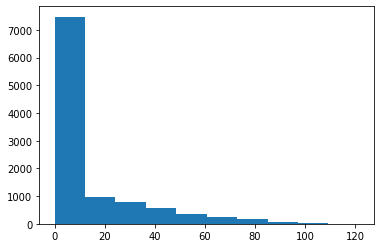

In [83]:
import matplotlib.pyplot as plt
plt.hist(rew)
plt.show()

In [84]:
X = np.hstack([obs[:-1], acs[:-1]])

In [85]:
print(np.mean(obs[1:] - obs[:-1], axis=0))
print(np.std(obs[1:] - obs[:-1], axis=0))

[-1.69375319e-04 -4.27221584e-05  9.03610462e-05  5.37380915e-05
  5.76759666e-05]
[0.37117282 0.12162466 0.42862899 0.27864469 0.3842016 ]


In [86]:
y = np.zeros([n,6])
y[:,:-1] = (obs[1:] - obs[:-1]) / np.array([0.37117282, 0.12162466, 0.42862899, 0.27864469, 0.3842016 ])
y[:,-1]  = (rew[:-1] - 12.06) / 20.66

In [87]:
#y = np.zeros([n,1])
#y[:,-1] = rew[:-1]

In [88]:
X = X[~dati['episode_starts'][1:]]
y = y[~dati['episode_starts'][1:]]

In [89]:
#print(np.mean(X, axis=0))
print(np.mean(y, axis=0))
#print(np.std(X, axis=0))
print(np.std(y, axis=0))

[-0.13903473 -0.02105472 -0.03283212  0.19366198  0.00438391  0.03324914]
[0.73502125 0.74973475 0.92204864 0.50986149 0.93298548 1.01779052]


In [90]:
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)
#y = StandardScaler().fit_transform(y)

In [91]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [93]:
regr = MLPRegressor(hidden_layer_sizes=(256,256), 
                     activation='relu',
                     solver='adam', 
                     alpha=0.0001, 
                     batch_size='auto', 
                     learning_rate='invscaling', 
                     learning_rate_init=0.001, 
                     power_t=0.5, max_iter=1000, shuffle=True, 
                     tol=0.0001, verbose=True, 
                     warm_start=False, momentum=0.9, 
                     nesterovs_momentum=True, early_stopping=True, 
                     validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                     epsilon=1e-08, n_iter_no_change=10, max_fun=15000,
                   )

In [94]:
regr = regr.fit(X_train, y_train)

Iteration 1, loss = 0.23158100
Validation score: 0.486965
Iteration 2, loss = 0.16204574
Validation score: 0.561332
Iteration 3, loss = 0.14782572
Validation score: 0.592450
Iteration 4, loss = 0.13901063
Validation score: 0.619755
Iteration 5, loss = 0.13263437
Validation score: 0.636770
Iteration 6, loss = 0.12836295
Validation score: 0.650703
Iteration 7, loss = 0.12184384
Validation score: 0.667276
Iteration 8, loss = 0.11711560
Validation score: 0.681387
Iteration 9, loss = 0.11302554
Validation score: 0.691864
Iteration 10, loss = 0.10905019
Validation score: 0.701047
Iteration 11, loss = 0.10764571
Validation score: 0.708454
Iteration 12, loss = 0.10596009
Validation score: 0.717548
Iteration 13, loss = 0.09987936
Validation score: 0.717167
Iteration 14, loss = 0.09855578
Validation score: 0.727405
Iteration 15, loss = 0.09575126
Validation score: 0.738150
Iteration 16, loss = 0.09516825
Validation score: 0.741593
Iteration 17, loss = 0.09022124
Validation score: 0.746540
Iterat

In [95]:
print(regr.score(X_test, y_test))
from sklearn.metrics import r2_score
X_test_noact = np.copy(X_test)
n_test = X_test.shape[0]
X_test_noact[:,-2:] = np.zeros([n_test, 2])

y_test_hat = regr.predict(X_test)
print(r2_score(y_test[:,3:5], y_test_hat[:,3:5]))
#print(r2_score(y_test[:,-1], y_test_hat[:,-1]))
y_test_noact_hat = regr.predict(X_test_noact)
print(r2_score(y_test[:,3:5], y_test_noact_hat[:,3:5]))

0.8194334126450896
0.7345355050106964
0.3817199305630557


32^2
0.7568775375158716
0.6618566505493315
0.3792859472529585

32^4
0.6790337384394276
0.3706717010875441

64^2
0.7890316324251868
0.695654767820375
0.4064780202314599

64^3
0.8050472956040292
0.7231935605209159
0.379271480435488

64x128x64
0.8017002731673505
0.7189430821483473
0.37180074395282325

128^2
0.8126686933062833
0.7375201987656768
0.40055354126739673

128^4
0.8104557255909789
0.7387669853417194
0.37929269607135496

256
0.7863730904575563
0.7091571089083142
0.3982262215382181

8x256
0.7668729199385614
0.6684689377923899
0.3910761956441275

256x128
0.8116519021776541
0.7413045875383611
0.36898949926441105

128x256
0.8166583345614731
0.7493261067038156
0.3717739442587401

256^2
0.8240627820769033
0.757434327159496
0.38575411601107523

256^3
0.8145780211741683
0.7332958111739403
0.3725881872520055

512
0.7917903198840671
0.7182124929605083
0.39966753727381105

512^2
0.8153211637061869
0.7443025983927569
0.38189329807387334


In [15]:
plt.hist([y_test_hat[:,-1], y_test[:,-1]])
plt.show()

NameError: name 'y_test_hat' is not defined

In [16]:
np.mean(rew)

12.063776888961495

In [17]:
np.mean(y[:,-1])

-6.558205083931056e-17

In [18]:
np.std(rew)

20.65619606251232

In [20]:
np.std((rew-12.06)/20.66)

0.9998158791148267

In [22]:
np.mean(y, axis=0)

array([ 1.05088295e-15, -1.08697401e-16, -5.91128201e-17, -7.13017489e-16,
       -3.83801543e-17, -7.56683763e-16])